<a href="https://colab.research.google.com/github/PaulToronto/Stanford-Andrew-Ng-Machine-Learning-Specialization/blob/main/1_2_2_2_Lab_Feature_engineering_and_Polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab - Feature engineering and Polynomial regression

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import math
import copy

## Functions

In [2]:
def compute_cost(X, y, w, b):
    """
    compute cost
    Args:
      X : (ndarray): Shape (m,n) matrix of examples with multiple features
      w : (ndarray): Shape (n)   parameters for prediction
      b : (scalar):              parameter  for prediction
    Returns
      cost: (scalar)             cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(X[i],w) + b
        cost = cost + (f_wb_i - y[i])**2
    cost = cost/(2*m)
    return(np.squeeze(cost))

In [3]:
def compute_gradient_matrix(X, y, w, b):
    """
    Computes the gradient for linear regression

    Args:
      X : (array_like Shape (m,n)) variable such as house size
      y : (array_like Shape (m,1)) actual value
      w : (array_like Shape (n,1)) Values of parameters of the model
      b : (scalar )                Values of parameter of the model
    Returns
      dj_dw: (array_like Shape (n,1)) The gradient of the cost w.r.t. the parameters w.
      dj_db: (scalar)                The gradient of the cost w.r.t. the parameter b.

    """
    m,n = X.shape
    f_wb = X @ w + b
    e   = f_wb - y
    dj_dw  = (1/m) * (X.T @ e)
    dj_db  = (1/m) * np.sum(e)

    return dj_db,dj_dw

In [4]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    """
    Performs batch gradient descent to learn theta. Updates theta by taking
    num_iters gradient steps with learning rate alpha

    Args:
      X : (array_like Shape (m,n)    matrix of examples
      y : (array_like Shape (m,))    target value of each example
      w_in : (array_like Shape (n,)) Initial values of parameters of the model
      b_in : (scalar)                Initial value of parameter of the model
      cost_function: function to compute cost
      gradient_function: function to compute the gradient
      alpha : (float) Learning rate
      num_iters : (int) number of iterations to run gradient descent
    Returns
      w : (array_like Shape (n,)) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """

    # number of training examples
    m = len(X)

    # An array to store values at each iteration primarily for graphing later
    hist={}
    hist["cost"] = []; hist["params"] = []; hist["grads"]=[]; hist["iter"]=[];

    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    save_interval = np.ceil(num_iters/10000) # prevent resource exhaustion for long runs

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save cost J,w,b at each save interval for graphing
        if i == 0 or i % save_interval == 0:
            hist["cost"].append(cost_function(X, y, w, b))
            hist["params"].append([w,b])
            hist["grads"].append([dj_dw,dj_db])
            hist["iter"].append(i)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            #print(f"Iteration {i:4d}: Cost {cost_function(X, y, w, b):8.2f}   ")
            cst = cost_function(X, y, w, b)
            print(f"Iteration {i:9d}, Cost: {cst:0.5e}")
    return w, b, hist #return w,b and history for graphing

In [5]:
def run_gradient_descent_feng(X,y,iterations=1000, alpha = 1e-6):
    m,n = X.shape
    # initialize parameters
    initial_w = np.zeros(n)
    initial_b = 0
    # run gradient descent
    w_out, b_out, hist_out = gradient_descent(X ,y, initial_w, initial_b,
                                               compute_cost, compute_gradient_matrix, alpha, iterations)
    print(f"w,b found by gradient descent: w: {w_out}, b: {b_out:0.4f}")

    return(w_out, b_out)

In [6]:
def zscore_normalize_features(X):
    """
    computes  X, zcore normalized by column

    Args:
      X (ndarray (m,n))     : input data, m examples, n features

    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """
    # find the mean of each feature
    mu = np.mean(X, axis=0)
    # find the standard deviation of each feature
    sigma = np.std(X, axis=0)
    # element-wise, subtract mean for each column and divide by standard deviation
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

## Feature Engineering and Polynomial Regression Overview

Linear regression provides a menas of building models of the form:

$$f_{\mathbf{w},b} = w_0x_0 + w_1x_1+ ... + w_{n-1}x_{n-1} + b$$

What if the features/data are non-linear? We only have the ability to modify paramenters $\mathbf{w},b$ to 'fit' the equation to the training data, but no amount of adjusting of $\mathbf{w},b$ will achieve a fit to a non-linear curve.

### Polynomial Features

Let's start with a simple quadratic; $y = 1 + x^2$

In [7]:
# create the data
x = np.arange(0, 20, 1)
y = 1 + x**2
X = x.reshape(-1, 1)
X, y

(array([[ 0],
        [ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10],
        [11],
        [12],
        [13],
        [14],
        [15],
        [16],
        [17],
        [18],
        [19]]),
 array([  1,   2,   5,  10,  17,  26,  37,  50,  65,  82, 101, 122, 145,
        170, 197, 226, 257, 290, 325, 362]))

In [8]:
model_w, model_b = run_gradient_descent_feng(X, y, iterations=1_000, alpha=1e-2)

Iteration         0, Cost: 1.65756e+03
Iteration       100, Cost: 6.94549e+02
Iteration       200, Cost: 5.88475e+02
Iteration       300, Cost: 5.26414e+02
Iteration       400, Cost: 4.90103e+02
Iteration       500, Cost: 4.68858e+02
Iteration       600, Cost: 4.56428e+02
Iteration       700, Cost: 4.49155e+02
Iteration       800, Cost: 4.44900e+02
Iteration       900, Cost: 4.42411e+02
w,b found by gradient descent: w: [18.69806954], b: -52.0834


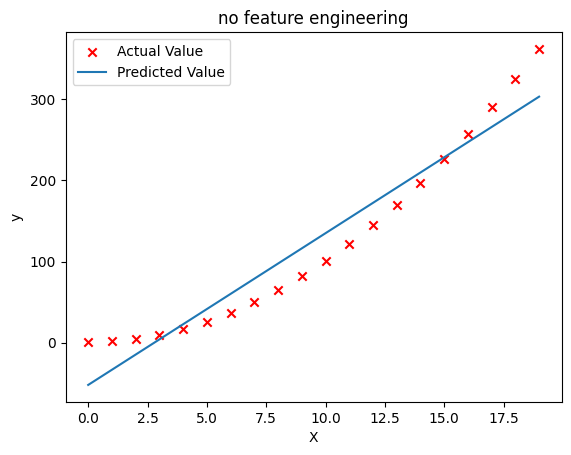

In [9]:
plt.scatter(x, y, marker='x', c='r', label='Actual Value')
plt.plot(x, X @ model_w + model_b, label='Predicted Value')
plt.title('no feature engineering')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

Well, as expected, not a great fit. What is needed is something like $y= w_0x_0^2 + b$, or a **polynomial feature**.
To accomplish this, you can modify the *input data* to *engineer* the needed features. If you swap the original data with a version that squares the $x$ value, then you can achieve $y= w_0x_0^2 + b$. Let's try it. Swap `X` for `X**2` below:

In [10]:
x = np.arange(0, 20, 1)
y = 1 + x**2 # note that the actual target hasn't changed
X = x**2
X = X.reshape(-1, 1)
X, y

(array([[  0],
        [  1],
        [  4],
        [  9],
        [ 16],
        [ 25],
        [ 36],
        [ 49],
        [ 64],
        [ 81],
        [100],
        [121],
        [144],
        [169],
        [196],
        [225],
        [256],
        [289],
        [324],
        [361]]),
 array([  1,   2,   5,  10,  17,  26,  37,  50,  65,  82, 101, 122, 145,
        170, 197, 226, 257, 290, 325, 362]))

In [11]:
model_w, model_b = run_gradient_descent_feng(X, y, iterations=10_000, alpha=1e-5)

Iteration         0, Cost: 7.32922e+03
Iteration      1000, Cost: 2.24844e-01
Iteration      2000, Cost: 2.22795e-01
Iteration      3000, Cost: 2.20764e-01
Iteration      4000, Cost: 2.18752e-01
Iteration      5000, Cost: 2.16758e-01
Iteration      6000, Cost: 2.14782e-01
Iteration      7000, Cost: 2.12824e-01
Iteration      8000, Cost: 2.10884e-01
Iteration      9000, Cost: 2.08962e-01
w,b found by gradient descent: w: [1.00417494], b: 0.0490


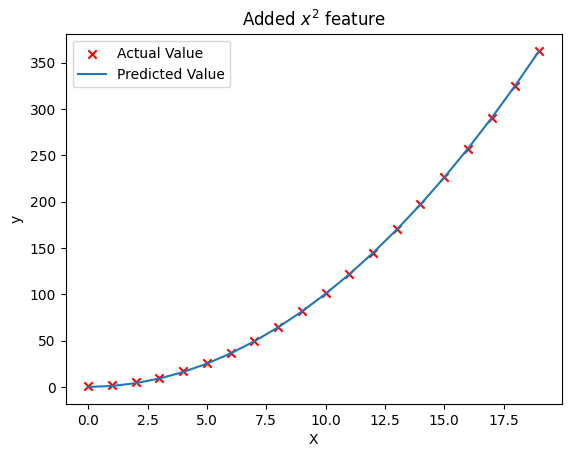

In [12]:
plt.scatter(x, y, marker='x', c='r', label='Actual Value')
plt.plot(x, X @ model_w + model_b, label='Predicted Value')
plt.title(r'Added $x^{2}$ feature')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

Great! near perfect fit. Notice the values of $\mathbf{w}$ and b printed right above the graph: `w,b found by gradient descent: w: [1.], b: 0.0490`. Gradient descent modified our initial values of $\mathbf{w},b $ to be (1.0,0.049) or a model of $y=1*x_0^2+0.049$, very close to our target of $y=1*x_0^2+1$. If you ran it longer, it could be a better match.

### Selecting Features

Above, we knew that an $x^2$ term was required. It may not always be obvious which features are required. One could add a variety of potential features to try and find the most useful. For example, what if we had instead tried : $y=w_0x_0 + w_1x_1^2 + w_2x_2^3+b$ ?

In [13]:
# create the data
x = np.arange(0, 20, 1)
y = x**2

X = np.c_[x, x**2, x**3] #added engineered features
X

array([[   0,    0,    0],
       [   1,    1,    1],
       [   2,    4,    8],
       [   3,    9,   27],
       [   4,   16,   64],
       [   5,   25,  125],
       [   6,   36,  216],
       [   7,   49,  343],
       [   8,   64,  512],
       [   9,   81,  729],
       [  10,  100, 1000],
       [  11,  121, 1331],
       [  12,  144, 1728],
       [  13,  169, 2197],
       [  14,  196, 2744],
       [  15,  225, 3375],
       [  16,  256, 4096],
       [  17,  289, 4913],
       [  18,  324, 5832],
       [  19,  361, 6859]])

In [14]:
model_w, model_b = run_gradient_descent_feng(X, y, iterations=10_000, alpha=1e-7)

Iteration         0, Cost: 1.14029e+03
Iteration      1000, Cost: 3.28539e+02
Iteration      2000, Cost: 2.80443e+02
Iteration      3000, Cost: 2.39389e+02
Iteration      4000, Cost: 2.04344e+02
Iteration      5000, Cost: 1.74430e+02
Iteration      6000, Cost: 1.48896e+02
Iteration      7000, Cost: 1.27100e+02
Iteration      8000, Cost: 1.08495e+02
Iteration      9000, Cost: 9.26132e+01
w,b found by gradient descent: w: [0.08237526 0.53552137 0.02752216], b: 0.0106


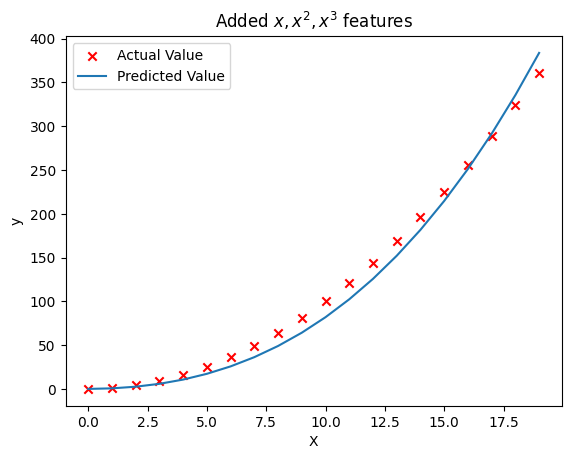

In [15]:
plt.scatter(x, y, marker='x', c='r', label='Actual Value')
plt.plot(x, X @ model_w + model_b, label='Predicted Value')
plt.title(r'Added $x, x^{2}, x^{3}$ features')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

Note the value of $\mathbf{w}$, `[0.08 0.54 0.03]` and b is `0.0106`.This implies the model after fitting/training is:
$$ 0.08x + 0.54x^2 + 0.03x^3 + 0.0106 $$
Gradient descent has emphasized the data that is the best fit to the $x^2$ data by increasing the $w_1$ term relative to the others.  If you were to run for a very long time, it would continue to reduce the impact of the other terms.
>Gradient descent is picking the 'correct' features for us by emphasizing its associated parameter

Let's review this idea:
- Intially, the features were re-scaled so they are comparable to each other
- less weight value implies less important/correct feature, and in extreme, when the weight becomes zero or very close to zero, the associated feature is not useful in fitting the model to the data.
- above, after fitting, the weight associated with the $x^2$ feature is much larger than the weights for $x$ or $x^3$ as it is the most useful in fitting the data.

### An Alternate View

Above, polynomial features were chosen based on how well they matched the target data. Another way to think about this is to note that we are still using linear regression once we have created new features. Given that, **the best features will be linear relative to the target**. This is best understood with an example.

In [16]:
# create the data
x = np.arange(0, 20, 1)
y = x**2

X = np.c_[x, x**2, x**3] #added engineered features
X

array([[   0,    0,    0],
       [   1,    1,    1],
       [   2,    4,    8],
       [   3,    9,   27],
       [   4,   16,   64],
       [   5,   25,  125],
       [   6,   36,  216],
       [   7,   49,  343],
       [   8,   64,  512],
       [   9,   81,  729],
       [  10,  100, 1000],
       [  11,  121, 1331],
       [  12,  144, 1728],
       [  13,  169, 2197],
       [  14,  196, 2744],
       [  15,  225, 3375],
       [  16,  256, 4096],
       [  17,  289, 4913],
       [  18,  324, 5832],
       [  19,  361, 6859]])

In [17]:
X_features = [r'$x$', r'$x^{2}$', r'$x^{3}$']

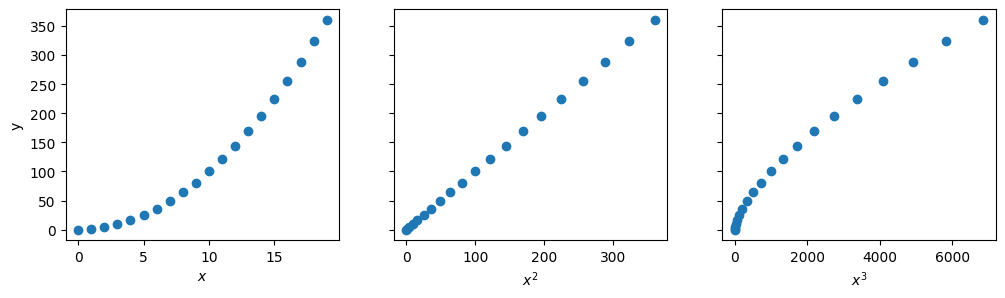

In [18]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3), sharey=True)

for i in range(len(ax)):
    ax[i].scatter(X[:, i], y)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel('y')
plt.show()

Above, it is clear that the $x^2$ feature mapped against the target value $y$ is linear. Linear regression can then easily generate a model using that feature.

### Scaling features

As described in the last lab, if the data set has features with significantly different scales, one should apply feature scaling to speed gradient descent. In the example above, there is $x$, $x^2$ and $x^3$ which will naturally have very different scales. Let's apply Z-score normalization to our example.

In [19]:
# create the data
x = np.arange(0, 20, 1)
y = x**2

X = np.c_[x, x**2, x**3] #added engineered features
X, mu, sigma = zscore_normalize_features(X)

In [20]:
# with normalized data we can use a much larger alpha
model_w, model_b = run_gradient_descent_feng(X, y, iterations=100000, alpha=1e-1)

Iteration         0, Cost: 9.42147e+03
Iteration     10000, Cost: 3.90938e-01
Iteration     20000, Cost: 2.78389e-02
Iteration     30000, Cost: 1.98242e-03
Iteration     40000, Cost: 1.41169e-04
Iteration     50000, Cost: 1.00527e-05
Iteration     60000, Cost: 7.15855e-07
Iteration     70000, Cost: 5.09763e-08
Iteration     80000, Cost: 3.63004e-09
Iteration     90000, Cost: 2.58497e-10
w,b found by gradient descent: w: [5.26616827e-05 1.13494579e+02 8.43238778e-05], b: 123.5000


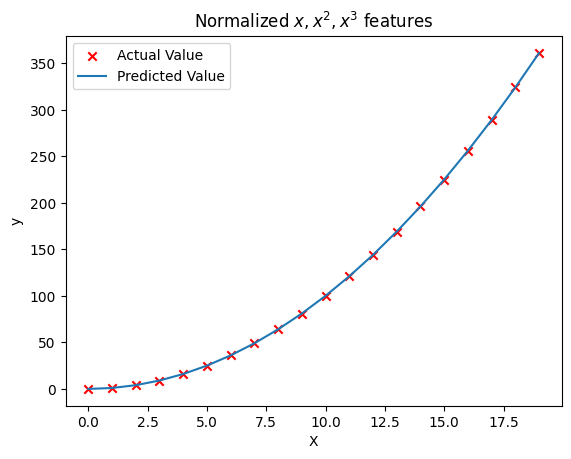

In [21]:
plt.scatter(x, y, marker='x', c='r', label='Actual Value')
plt.plot(x, X @ model_w + model_b, label='Predicted Value')
plt.title(r'Normalized $x, x^{2}, x^{3}$ features')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

Feature scaling allows this to converge much faster.   
Note again the values of $\mathbf{w}$. The $w_1$ term, which is the $x^2$ term is the most emphasized. Gradient descent has all but eliminated the $x^3$ term.

### Complex Functions

In [22]:
x = np.arange(0, 20, 1)
y = np.cos(x/2)

X = np.c_[x, x**2, x**3,x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11, x**12, x**13]
X

array([[                0,                 0,                 0,
                        0,                 0,                 0,
                        0,                 0,                 0,
                        0,                 0,                 0,
                        0],
       [                1,                 1,                 1,
                        1,                 1,                 1,
                        1,                 1,                 1,
                        1,                 1,                 1,
                        1],
       [                2,                 4,                 8,
                       16,                32,                64,
                      128,               256,               512,
                     1024,              2048,              4096,
                     8192],
       [                3,                 9,                27,
                       81,               243,               729,
      

In [23]:
X, mu, sigma = zscore_normalize_features(X)
X

array([[-1.64750894, -1.08815641, -0.86396619, -0.73740575, -0.65395821,
        -0.59385963, -0.5480448 , -0.5117086 , -0.48203982, -0.45727116,
        -0.43622902, -0.41809962, -0.40229855],
       [-1.47408695, -1.07934543, -0.86348754, -0.73737954, -0.65395678,
        -0.59385955, -0.5480448 , -0.5117086 , -0.48203982, -0.45727116,
        -0.43622902, -0.41809962, -0.40229855],
       [-1.30066495, -1.05291248, -0.86013698, -0.73698637, -0.65391239,
        -0.59385464, -0.54804426, -0.51170855, -0.48203981, -0.45727116,
        -0.43622902, -0.41809962, -0.40229855],
       [-1.12724296, -1.00885756, -0.8510426 , -0.73528265, -0.65361023,
        -0.59380283, -0.54803557, -0.51170711, -0.48203958, -0.45727112,
        -0.43622902, -0.41809962, -0.40229855],
       [-0.95382097, -0.94718068, -0.83333249, -0.7306957 , -0.65249181,
        -0.59354053, -0.54797566, -0.51169368, -0.48203661, -0.45727047,
        -0.43622888, -0.41809959, -0.40229854],
       [-0.78039897, -0.867881

In [24]:
model_w, model_b = run_gradient_descent_feng(X, y, iterations=1000000, alpha = 1e-1)

Iteration         0, Cost: 2.20188e-01
Iteration    100000, Cost: 1.70074e-02
Iteration    200000, Cost: 1.27603e-02
Iteration    300000, Cost: 9.73032e-03
Iteration    400000, Cost: 7.56440e-03
Iteration    500000, Cost: 6.01412e-03
Iteration    600000, Cost: 4.90251e-03
Iteration    700000, Cost: 4.10351e-03
Iteration    800000, Cost: 3.52730e-03
Iteration    900000, Cost: 3.10989e-03
w,b found by gradient descent: w: [ -1.33565562 -10.00231728  24.77799625   5.96170981 -12.48587921
 -16.26275994  -9.50807133   0.59194813   8.70295901  11.9412625
   9.27097351   0.78896901 -12.81745188], b: -0.0073


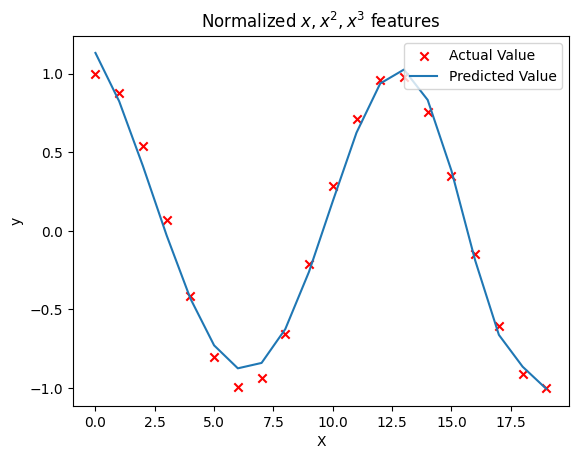

In [25]:
plt.scatter(x, y, marker='x', c='r', label='Actual Value')
plt.plot(x, X @ model_w + model_b, label='Predicted Value')
plt.title(r'Normalized $x, x^{2}, x^{3}$ features')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()